In [1]:
import numpy as np
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
%matplotlib inline
import tensorflow as tf
print("We're using TF", tf.__version__)
import keras

We're using TF 1.15.0


Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data(path = 'train_32x32.mat')

In [3]:
X_train = X_train.astype(float) / 255.
X_test = X_test.astype(float) / 255.
X_train, X_val = X_train[:-10000], X_train[-10000:]
y_train, y_val = y_train[:-10000], y_train[-10000:]

In [4]:
print("X_train [shape %s] sample patch:\n" % (str(X_train.shape)), X_train[1, 15:20, 5:10])
print("A closeup of a sample patch:")

X_train [shape (50000, 28, 28)] sample patch:
 [[0.         0.29803922 0.96470588 0.98823529 0.43921569]
 [0.         0.33333333 0.98823529 0.90196078 0.09803922]
 [0.         0.33333333 0.98823529 0.8745098  0.        ]
 [0.         0.33333333 0.98823529 0.56862745 0.        ]
 [0.         0.3372549  0.99215686 0.88235294 0.        ]]
A closeup of a sample patch:


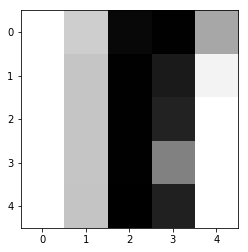

And the whole sample:


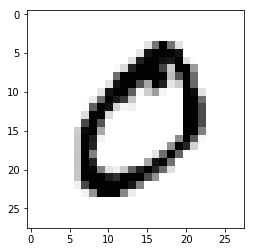

In [5]:
plt.imshow(X_train[1, 15:20, 5:10], cmap="Greys")
plt.show()
print("And the whole sample:")
plt.imshow(X_train[1], cmap="Greys")
plt.show()

In [6]:
print("y_train [shape %s] 10 samples:\n" % (str(y_train.shape)), y_train[:10])

y_train [shape (50000,)] 10 samples:
 [5 0 4 1 9 2 1 3 1 4]


In [7]:
X_train_flat = X_train.reshape((X_train.shape[0], -1))
print(X_train_flat.shape)

(50000, 784)


In [8]:
X_val_flat = X_val.reshape((X_val.shape[0], -1))
print(X_val_flat.shape)

(10000, 784)


In [9]:
y_train_oh = keras.utils.to_categorical(y_train, 10)
y_val_oh = keras.utils.to_categorical(y_val, 10)

In [10]:
from keras import backend as K

def reset_tf_session():
    curr_session = tf.get_default_session()
    # close current session
    if curr_session is not None:
        curr_session.close()
    # reset graph
    K.clear_session()
    # create new session
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    s = tf.InteractiveSession(config=config)
    K.set_session(s)
    return s

In [11]:
W = tf.get_variable("W", shape=(784, 10), dtype=tf.float32, trainable=True) ### tf.get_variable(...) with shape[0] = 784
b = tf.get_variable("b", shape=(10,), dtype=tf.float32) ### tf.get_variable(...)

In [12]:
# Placeholders for the input data
input_X = tf.placeholder(tf.float32, shape=(None, 784)) ### tf.placeholder(...) for flat X with shape[0] = None for any batch size
input_y = tf.placeholder(tf.float32, shape=(None, 10))###  tf.placeholder(...) for one-hot encoded true labels

In [13]:
# Compute predictions
logits = input_X @ W + b ### logits for input_X, resulting shape should be [input_X.shape[0], 10]
probas = tf.nn.softmax(logits) ### apply tf.nn.softmax to logits
classes = tf.argmax(probas,1) ### apply tf.argmax to find a class index with highest probability

# Loss should be a scalar number: average loss over all the objects with tf.reduce_mean().
# Use tf.nn.softmax_cross_entropy_with_logits on top of one-hot encoded input_y and logits.
# It is identical to calculating cross-entropy on top of probas, but is more numerically friendly (read the docs).
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=input_y, logits=logits))### YOUR CODE HERE ### cross-entropy loss

# Use a default tf.train.AdamOptimizer to get an SGD step
step = tf.train.AdamOptimizer().minimize(loss) ### optimizer step that minimizes the loss

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [14]:
s = reset_tf_session()
s.run(tf.global_variables_initializer())

BATCH_SIZE = 512
EPOCHS = 40


for epoch in range(EPOCHS):  # we finish an epoch when we've looked at all training samples
    
    batch_losses = []
    for batch_start in range(0, X_train_flat.shape[0], BATCH_SIZE):
        _, batch_loss = s.run([step, loss], {
        input_X: X_train_flat[batch_start: batch_start + BATCH_SIZE],
        input_y: y_train_oh[batch_start: batch_start + BATCH_SIZE]})
        batch_losses.append(batch_loss)

    train_loss = np.mean(batch_losses)
    val_loss = s.run(loss, {input_X: X_val_flat, input_y: y_val_oh})  # this part is usually small
    train_accuracy = accuracy_score(y_train, s.run(classes, {input_X: X_train_flat}))  # this is slow and usually skipped
    valid_accuracy = accuracy_score(y_val, s.run(classes, {input_X: X_val_flat}))  
    simpleTrainingCurves.add(train_loss, val_loss, train_accuracy, valid_accuracy)

TypeError: Cannot interpret feed_dict key as Tensor: Tensor Tensor("Placeholder:0", shape=(?, 784), dtype=float32) is not an element of this graph.

In [ ]:
from matplotlib
import pyplot as plt
from IPython.display
import clear_output, display_html, HTML
import contextlib
import time
import io
import urllib
import base64

In [ ]:
def clear_and_display_figure(fig, sleep = 0.01):
    img_data = io.BytesIO()
    fig.savefig(img_data, format = 'jpeg')
    img_data.seek(0)
    uri = 'data:image/jpeg;base64,'\ +
    urllib.request.quote(base64.b64encode(img_data.getbuffer()))
    img_data.close()
    clear_output(wait = True)
    display_html(HTML('<img src="' + uri + '">'))
    time.sleep(sleep)


In [ ]:
class SimpleMovieWriter(object):
   """
   Usage example:anim = animation.FuncAnimation(...)
   anim.save(None, writer = SimpleMovieWriter(sleep = 0.01))
   """
   def __init__(self, sleep = 0.1):
      self.sleep = sleep
   def setup(self, fig):
      self.fig = fig
   def grab_frame(self, ** kwargs):
      clear_and_display_figure(self.fig, self.sleep)
      @contextlib.contextmanager
   def saving(
      self,
      fig,
      * args, **
      kwargs
   ):
       self.setup(fig)
       try:
           yield self
       finally:
          pass
class SimpleTrainingCurves(object):
   def __init__(self, loss_name, metric_name):
   (self.fig, (self.ax1, self.ax2)) = plt.subplots(nrows = 1,
      ncols = 2, figsize = (12, 4))
   self.ax1.set_title(loss_name)
   self.ax2.set_title(metric_name)
   (self.train_loss_curve, ) = self.ax1.plot([], [], 'r',
      label = 'train', lw = 2)
   (self.valid_loss_curve, ) = self.ax1.plot([], [], 'g',
      label = 'valid', lw = 2)
   (self.train_metric_curve, ) = self.ax2.plot([], [], 'r',
      label = 'train', lw = 2)
   (self.valid_metric_curve, ) = self.ax2.plot([], [], 'g',
      label = 'valid', lw = 2)
   self.iter = 0
   self.y_limits_1 = [None, None]
   self.y_limits_2 = [None, None]
   plt.close(self.fig)
   def _update_y_limits(self, limits, * values):
      limits[0] = min(list(values) +
         (([limits[0]]
            if limits[0]
            else [])))
   limits[1] = max(list(values) +
      (([limits[1]]
         if limits[1]
         else [])))
   def _update_curve(
         self,
         curve,
         value,
         label,
      ):
      (x, y) = curve.get_data()
   curve.set_data(list(x) + [self.iter], list(y) + [value])
   curve.set_label('{}: {}'.format(label, value))
   def _set_y_limits(self, ax, limits):
      spread = limits[1] - limits[0]
      ax.set_ylim(limits[0] - 0.05 * spread, limits[1] + 0.05 *
      spread)
   def add(
         self,
         train_loss,
         valid_loss,
         train_metric,
         valid_metric,
      ):
   self._update_curve(self.train_loss_curve, train_loss, 'train')
   self._update_curve(self.valid_loss_curve, valid_loss, 'valid')
   self._update_curve(self.train_metric_curve, train_metric,
      'train')
   self._update_curve(self.valid_metric_curve, valid_metric,
      'valid')
   self.ax1.set_xlim(0, self.iter)
   self.ax2.set_xlim(0, self.iter)
   self._update_y_limits(self.y_limits_1, train_loss, valid_loss)
   self._update_y_limits(self.y_limits_2, train_metric,
      valid_metric)
   self._set_y_limits(self.ax1, self.y_limits_1)
   self._set_y_limits(self.ax2, self.y_limits_2)
   clear_and_display_figure(self.fig)
   self.ax1.legend()
   self.ax2.legend()
   self.iter += 1